### Complete linear regression using scikit-learn dataset

In this notebook, we will look at a linear regression model fit on a scikit-learn regression dataset

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Prepare data
# 100 samples, 1 feature, some noise, random_state=1
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [3]:
# X and y are in numpy format
# Convert them into pytorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [4]:
# y is in a single row
# As per pytorch convention, y should have as many outputs as there are input samples
# We will need to reshape y
y = y.view(y.shape[0], 1) # Squash the data into 1 column

In [5]:
# Define the number of inputs and outputs
num_samples, num_features = X.shape
num_outputs = y.shape[1]

# Declare the model
model = nn.Linear(num_features, num_outputs)

# Declare criterion or loss function
criterion = nn.MSELoss()

# Define hyperparameters
alpha = 0.01 # Learning rate

# Declare optimiser
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

# Training loop
epochs = 500

for epoch in range(epochs):
    # Forward pass - prediction
    out = model(X)
    # Loss
    loss = criterion(out, y)
    # Backward
    loss.backward()
    # Gradient updates
    optimizer.step()
    # Zero out gradients
    optimizer.zero_grad()
    
    # Print some info
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss: {loss.item():.3f}")

Epoch 10: Loss: 4345.533
Epoch 20: Loss: 3244.003
Epoch 30: Loss: 2446.661
Epoch 40: Loss: 1868.908
Epoch 50: Loss: 1449.865
Epoch 60: Loss: 1145.666
Epoch 70: Loss: 924.656
Epoch 80: Loss: 763.963
Epoch 90: Loss: 647.045
Epoch 100: Loss: 561.924
Epoch 110: Loss: 499.915
Epoch 120: Loss: 454.720
Epoch 130: Loss: 421.762
Epoch 140: Loss: 397.718
Epoch 150: Loss: 380.170
Epoch 160: Loss: 367.358
Epoch 170: Loss: 358.001
Epoch 180: Loss: 351.164
Epoch 190: Loss: 346.168
Epoch 200: Loss: 342.516
Epoch 210: Loss: 339.846
Epoch 220: Loss: 337.894
Epoch 230: Loss: 336.465
Epoch 240: Loss: 335.420
Epoch 250: Loss: 334.656
Epoch 260: Loss: 334.096
Epoch 270: Loss: 333.687
Epoch 280: Loss: 333.387
Epoch 290: Loss: 333.168
Epoch 300: Loss: 333.007
Epoch 310: Loss: 332.889
Epoch 320: Loss: 332.803
Epoch 330: Loss: 332.740
Epoch 340: Loss: 332.694
Epoch 350: Loss: 332.660
Epoch 360: Loss: 332.635
Epoch 370: Loss: 332.617
Epoch 380: Loss: 332.604
Epoch 390: Loss: 332.594
Epoch 400: Loss: 332.587
Epo

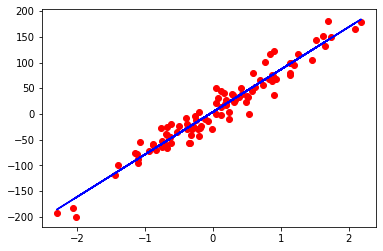

In [6]:
# After the training, we may want to plot the results
preds = model(X).detach() # We do not want this particular calculation to be part of the computational graph which is required only in training
plt.plot(X, y, 'ro')
plt.plot(X, preds, 'b')